## Some EDA and visualization on the datasets
The information here can be useful in deciding about the model parameters and preprocessing of the text.

In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [2]:
#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

## Loading datasets:

In [3]:
reddit = pd.read_csv('reddit.csv')
tweet = pd.read_csv('tweet.csv')
kaggle = pd.read_csv('kaggle.csv')
ongo = pd.read_csv('ONGO.csv')
all_data = pd.read_csv('all_cleaned.csv')

In [ ]:
all_data.shape

In [8]:
all_data.sample(5)

,text,hate,offensive,ok
2793,warriors fuckin suck dick bitch,1,0,0
7225,not at all nigga didnt even fucking give a lin...,1,0,0
12833,Presentation of data with explanations from NY...,0,0,1
1664,racist faggot,1,0,0
13734,[OC] Job applications of a Mech Engineer summe...,0,0,1


In [11]:
#defining columns
cols = ['hate', 'offensive', 'ok']

In [12]:
print("Check for missing values in Train dataset")
null_check_reddit=reddit.isnull().sum()
null_check_tweet=tweet.isnull().sum()
null_check_kaggle=kaggle.isnull().sum()
null_check_kaggle=kaggle.isnull().sum()
print(null_check_reddit, null_check_tweet, null_check_kaggle)


Check for missing values in Train dataset
text         0
hate         0
offensive    0
ok           0
dtype: int64 text         0
hate         0
offensive    0
ok           0
dtype: int64 text         0
hate         0
offensive    0
ok           0
dtype: int64


In [13]:
reddit['len'] = reddit['text'].apply(lambda x:len(str(x)))
tweet['len'] = tweet['text'].apply(lambda x:len(str(x)))
kaggle['len'] = kaggle['text'].apply(lambda x:len(str(x)))

ongo['len'] = ongo['text'].apply(lambda x:len(str(x)))

Plotting histogram of comments length to compare with the base dataset in 3D.

No handles with labels found to put in legend.


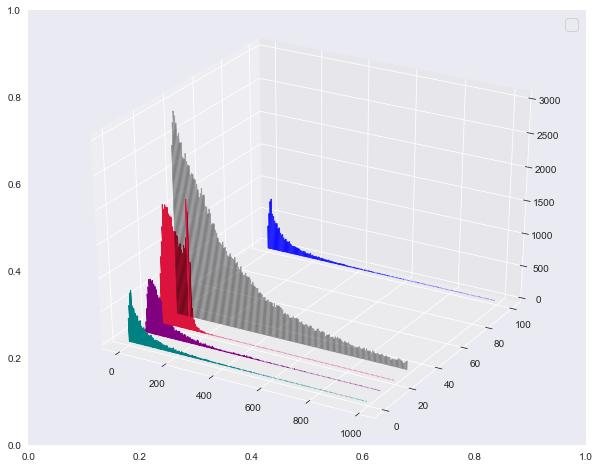

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10,8))
plt.gca().patch.set_facecolor('white')
ax = fig.add_subplot(111, projection='3d')
nbins = np.arange(0,1000,5)
for c, z in zip(['teal', 'purple','crimson', 'black'], [ 0, 10, 20, 30]):
    if z == 10:
        ys = reddit.len#,tweet.len,kaggle.len,ongo.len)
        hist, bins = np.histogram(ys, bins=nbins)
        xs = (bins[:-1] + bins[1:])/2
        ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=1)
    if z == 30:
        ys = kaggle.len#,tweet.len,kaggle.len,ongo.len)
        hist, bins = np.histogram(ys, bins=nbins)
        xs = (bins[:-1] + bins[1:])/2
        ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=0.3)
    if z == 20:
        ys = tweet.len#,tweet.len,kaggle.len,ongo.len)
        hist, bins = np.histogram(ys, bins=nbins)
        xs = (bins[:-1] + bins[1:])/2
        ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=1)
    if z == 0:
        ys = ongo.len#,tweet.len,kaggle.len,ongo.len)
        hist, bins = np.histogram(ys, bins=nbins)
        xs = (bins[:-1] + bins[1:])/2
        ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=1)

plt.legend(prop={'size': 16})

plt.show()

In [ ]:
#Plotting histogram of comments length to compare with the base dataset in 3D.

fig, ax = plt.subplots(figsize=(10,8))

colors = ['red', 'tan', 'lime','black']
plt.hist(kaggle.len, bins=np.arange(0,1000,10), histtype='bar',stacked=True, color='black', label= 'kaggle')
plt.hist(tweet.len, bins=np.arange(0,1000,10), histtype='bar',stacked=True, color='red', label= 'twitter')
plt.hist(reddit.len, bins=np.arange(0,1000,10), histtype='bar',stacked=True, color='purple', label= 'reddit')
plt.hist(ongo.len, bins=np.arange(0,1000,10), histtype='bar',stacked=True, color='teal', label= 'ongo')
plt.legend(prop={'size': 16})
ax.set_title('Length of comments',fontsize=18)
plt.xlabel("# of chars ",fontsize=18)
plt.ylabel("# of occurrences",fontsize=18)

fig.tight_layout()
plt.show()

In [ ]:
def count(word, datast):
    """
    Input: a dataset and a word
    Output: the number of times that the word is used in
    offensive language and the number of times that the word is seen 
    in the comment"""
    SUM=0
    COUNT=0
    for i in range(len(dataset)):
    if word in dataset['text'][i]:
        SUM += dataset['offensive'][i]+dataset['hate'][i]
        COUNT += 1for i in range(len(dataset)):
    if wor in dataset['text'][i]:
        SUM += dataset['offensive'][i]+dataset['hate'][i]
        COUNT += 1
    return (SUM, COUNT)

In [49]:
data = pd.read_csv('all_cleaned.csv')
data['sentiment']=0 

In [50]:
 
for i,j in data.iterrows():
    if data.hate[i] ==1:
        data['sentiment'][i]='zero tolerance'
    elif data.offensive[i]==1:
        data['sentiment'][i]='offensive'
    else:
        data['sentiment'][i]='fine'

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.4)
b =sns.countplot(data.sentiment,palette="viridis")


#b.set_title('Length of comments',fontsize=18)

plt.ylabel("# of occurrences",fontsize=18);
plt.xlabel("",fontsize=18);

In [152]:
## Indirect features

data['count_word']=data['text'].apply(lambda x: len(str(x).split()))


Text(0, 0.5, '')

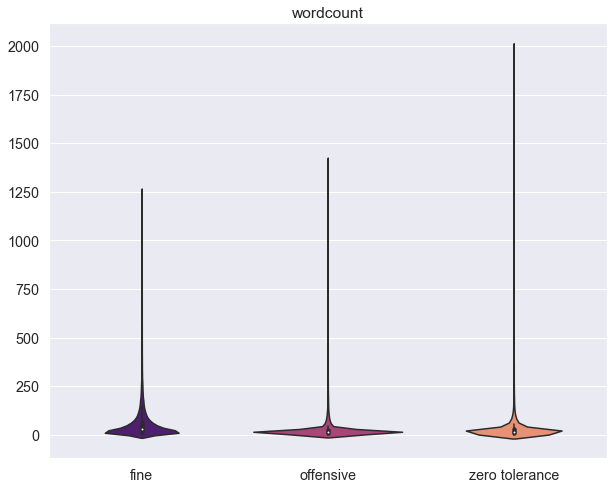

In [165]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.3)
sns.violinplot(x=data['sentiment'], y=data['count_word'], palette="magma")
plt.title("wordcount")
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=10)

In [154]:

def clean_text(text):
    text = re.sub('Wikipedia', '',text)
    return text
  
data['text'] = data['text'].map(lambda x: clean_text(x))


In [155]:
text=data['text'].values

In [156]:
#Creating word clouud 
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

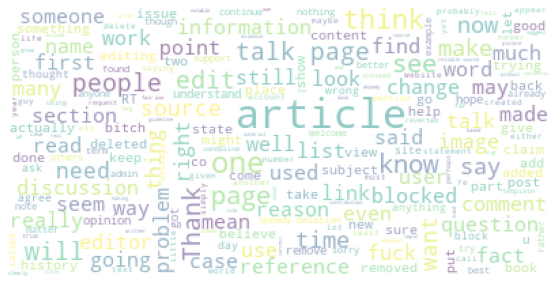

In [31]:
plt.figure(figsize=(10,5))
wc = WordCloud(background_color="white", max_words=25000, stopwords=STOPWORDS, max_font_size= 30)
wc.generate(" ".join(text))
#plt.title("HP Lovecraft (Cthulhu-Squidy)", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( random_state=17), alpha=0.5)
plt.axis('off')
